# New predictions    
  
In this noteboook we use the models we built in the previous notebook to make predictions on the MedChemExpress library, as well as Halicin and Abaucin
  


In [1]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats.mstats import gmean

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

from dataset.dataset_representation import process_dataset

## Set up directories

In [2]:
MODEL_DIR = "../data/03.model_evaluation/"
PROCESSED_DATA_DIR = "../data/01.prepare_training_data/"
RAW_DATA_DIR = "../raw_data/"

OUTPUT_DIR = "../data/04.new_predictions"
os.makedirs(OUTPUT_DIR, exist_ok=True)

## Read models

In [3]:
# MolE model
with open(os.path.join(MODEL_DIR, "MolE-XGBoost-08.03.2024_14.20.pkl"), "rb") as file:
    mole_model = pickle.load(file)

# ECFP4 model
with open(os.path.join(MODEL_DIR, "ecfp4-XGBoost-08.03.2024_14.20.pkl"), "rb") as file:
    ecfp4_model = pickle.load(file)

# ChemDesc model
with open(os.path.join(MODEL_DIR, "chemDesc-XGBoost-08.03.2024_14.20.pkl"), "rb") as file:
    chemDesc_model = pickle.load(file)

# Read optimized parameters
optimized_parameters = pd.read_csv(os.path.join(MODEL_DIR, "optimal_thresholds.tsv.gz"), sep='\t')

## Prepare representations for Halicin and Abaucin

In [4]:
# Create the dictionary with SMILES
novel_abx = {"compound": ["Halicin", "Abaucin"],
            "pchem_id": [11837140, 10000456],
             "pchem_canonical_smiles": ["C1=C(SC(=N1)SC2=NN=C(S2)N)[N+](=O)[O-]", "C1CN(CCC12C3=CC=CC=C3NC(=O)O2)CCC4=CC=C(C=C4)C(F)(F)F"],
             "pchem_isomeric_smiles": ["C1=C(SC(=N1)SC2=NN=C(S2)N)[N+](=O)[O-]", "C1CN(CCC12C3=CC=CC=C3NC(=O)O2)CCC4=CC=C(C=C4)C(F)(F)F"]}

pd.DataFrame(novel_abx).to_csv(os.path.join(OUTPUT_DIR, "novel_abx_smiles.tsv.gz"), sep='\t')

In [5]:
mole_novel = process_dataset(dataset_path = os.path.join(OUTPUT_DIR, "novel_abx_smiles.tsv.gz"), 
                                                  pretrain_architecture = "gin_concat", 
                                                  pretrained_model = "model_ginconcat_btwin_100k_d8000_l0.0001", 
                                                  dataset_split=False,
                                                  smile_column_str = "pchem_canonical_smiles", 
                                                  id_column_str = "compound")

#mole_novel.to_csv(os.path.join(OUTPUT_DIR, "MolE_novel_abx.tsv.gz"), sep='\t')

Representation dimension (1000) - Embedding dimension (8000)
../pretrained_model/model_ginconcat_btwin_100k_d8000_l0.0001/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.wei

## Prepare representations for MedChemExpress

In [7]:
mole_mce = process_dataset(dataset_path = os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), 
                                                  pretrain_architecture = "gin_concat", 
                                                  pretrained_model = "model_ginconcat_btwin_100k_d8000_l0.0001", 
                                                  dataset_split=False,
                                                  smile_column_str = "rdkit_no_salt", 
                                                  id_column_str = "Catalog Number")

#mole_mce.to_csv(os.path.join(OUTPUT_DIR, "MolE_representation_medchemexpress.tsv.gz"), sep='\t')

Representation dimension (1000) - Embedding dimension (8000)
../pretrained_model/model_ginconcat_btwin_100k_d8000_l0.0001/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.wei

In [8]:
ecfp4_mce = process_dataset(dataset_path = os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), 
                            pretrained_model = "ECFP4", 
                            
                            dataset_split=False,
                            smile_column_str = "rdkit_no_salt", 
                            id_column_str = "Catalog Number")

#ecfp4_mce.to_csv(os.path.join(OUTPUT_DIR, "ecfp4_representation_medchemexpress.tsv.gz"), sep='\t')

In [9]:
chemdesc_mce = process_dataset(dataset_path = os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), 
                            pretrained_model = "ChemDesc", 
                            dataset_split=False,
                            smile_column_str = "pchem_isomeric_smile", 
                            id_column_str = "Catalog Number")

#chemdesc_mce.to_csv(os.path.join(OUTPUT_DIR, "chemDesc_representation_medchemexpress.tsv.gz"), sep='\t')

Could not compute descriptors for HY-B1831A
Could not compute descriptors for HY-N0239
Could not compute descriptors for HY-15991
Could not compute descriptors for HY-15664
Could not compute descriptors for HY-N2031
Could not compute descriptors for HY-N1981
Could not compute descriptors for HY-P0163
Could not compute descriptors for HY-B2136
Could not compute descriptors for HY-B2239
Could not compute descriptors for HY-13581A
Could not compute descriptors for HY-17565
Could not compute descriptors for HY-P0009A
Could not compute descriptors for HY-113498
Could not compute descriptors for HY-17565A
Could not compute descriptors for HY-B0108
Could not compute descriptors for HY-17586
Could not compute descriptors for HY-16168A
Could not compute descriptors for HY-107799
Could not compute descriptors for HY-P0059
Could not compute descriptors for HY-N0062
Could not compute descriptors for HY-N0118
Could not compute descriptors for HY-B2235
Could not compute descriptors for HY-N7075


## Predictions for novel antibiotics

In [4]:
# Results from screening
maier_screen = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, "maier_screening_results.tsv.gz"), sep='\t', index_col=0)

# Additional information for strains
maier_strains = pd.read_excel(os.path.join(RAW_DATA_DIR, "maier_microbiome", "strain_info_SF2.xlsx"),
                             skiprows=[0,1, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], 
                             index_col="NT data base")

# Additional information on chemical library
maier_library = pd.read_excel(os.path.join(RAW_DATA_DIR, "maier_microbiome", "chem_library_info_SF1.xlsx"))

# Prepare the OHE of the strains
def prep_ohe(categories):

    """
    Prepare one-hot encoding for strain variables.

    This function creates a one-hot encoding representation of the provided categorical variables.
    It fits a OneHotEncoder to the categories and transforms them into a pandas DataFrame.

    Parameters:
    - categories (array-like): Array-like object containing categorical variables.

    Returns:
    - cat_ohe (pandas.DataFrame): DataFrame representing the one-hot encoded categorical variables.
    """

    # Prepare OHE
    ohe = OneHotEncoder(sparse=False)

    # Fit OHE
    ohe.fit(pd.DataFrame(categories))

    # Prepare OHE
    cat_ohe = pd.DataFrame(ohe.transform(pd.DataFrame(categories)), columns=categories, index=categories)

    return cat_ohe

# Prepare the input for the prediction
def add_strains(chemfeats_df, ohe_df):

    """
    Add strains to chemical features using Cartesian product merge.

    This function adds strains to chemical features using Cartesian product merge
    between the chemical features DataFrame and the one-hot encoded strains DataFrame.

    Parameters:
    - chemfeats_df (pandas.DataFrame): DataFrame containing chemical features.
    - ohe_df (pandas.DataFrame): DataFrame containing one-hot encoded strains.

    Returns:
    - xpred (pandas.DataFrame): DataFrame containing chemical features with added strains.
    """

    # Prepare chemical features
    chemfe = chemfeats_df.reset_index().rename(columns={"index": "chem_id"})
    chemfe["chem_id"] = chemfe["chem_id"].astype(str) 

    # Prepare OHE
    sohe = ohe_df.reset_index().rename(columns={"index": "strain_name"})

    # Cartesian product merge
    xpred = chemfe.merge(sohe, how="cross")
    xpred["pred_id"] = xpred["chem_id"].str.cat(xpred["strain_name"], sep=":")

    xpred = xpred.set_index("pred_id")
    xpred = xpred.drop(columns=["chem_id", "strain_name"])

    # Make sure correct number of rows
    assert xpred.shape[0] == (chemfeats_df.shape[0] * ohe_df.shape[0])

    # Make sure correct number of features
    assert xpred.shape[1] == (chemfeats_df.shape[1] + ohe_df.shape[1])
    
    return xpred

# Function to make predictions
def make_predictions(model, chemrep_df, score_threshold, strain_categories = maier_screen.columns):

    """
    Make predictions using a trained model on chemical representations with added strains.

    This function makes predictions using a trained model on chemical representations with added strains.
    It applies a score threshold to the predicted probabilities and prepares the predictions for output.

    Parameters:
    - model: Trained model for making predictions.
    - chemrep_df (pandas.DataFrame): DataFrame containing chemical representations.
    - score_threshold (float): Threshold applied to scores for classification into growth or no-growth.
    - strain_categories (array-like): Array-like object containing strain categories (default is maier_screen.columns).

    Returns:
    - pred_df (pandas.DataFrame): DataFrame containing predictions with chemical IDs and strain names.
    """

    # Prepare the input for the prediction
    strain_ohe = prep_ohe(strain_categories)
    x_input = add_strains(chemrep_df, strain_ohe)

    # Make the prediction
    y_pred = model.predict_proba(x_input)[:,1]

    # Prepare the output
    pred_df = pd.DataFrame(y_pred, columns=["pred_score"], index=x_input.index)

    # Apply the threshold
    pred_df["pred_label"] = pred_df["pred_score"].apply(lambda x: 1 if x >= score_threshold else 0)

    # Prepare the output
    pred_df = pred_df.reset_index()
    pred_df["chem_id"] = pred_df["pred_id"].str.split(":", expand=True)[0]
    pred_df["strain_name"] = pred_df["pred_id"].str.split(":", expand=True)[1]
    pred_df = pred_df.drop(columns=["pred_id"])

    return pred_df

/home/roberto_olayo/miniconda3/envs/mole_test/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
mole_halicin_predictions = make_predictions(mole_model, mole_novel, optimized_parameters.loc[(optimized_parameters["representation"]== "MolE") &
                                                                                            (optimized_parameters["score_type"]== "optimized"), "threshold"].values[0])

<Axes: xlabel='strain_name', ylabel='chem_id'>

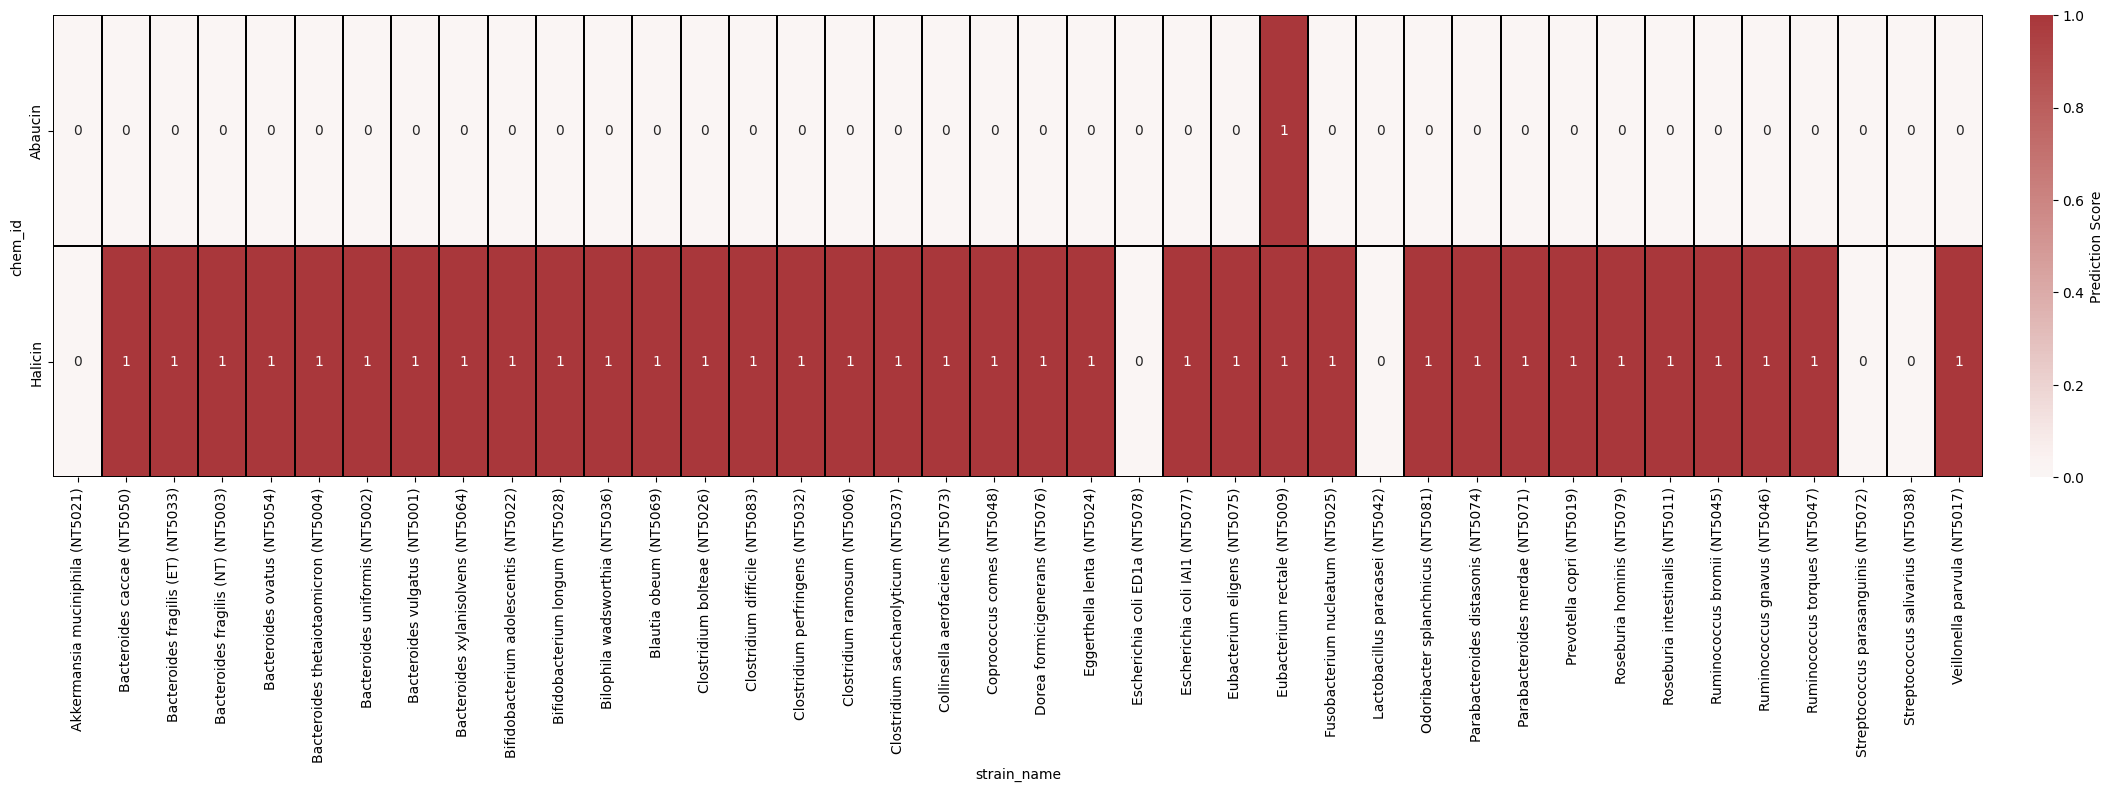

In [8]:
mole_halicin_predictions = mole_halicin_predictions.pivot_table(index="chem_id", columns="strain_name", values="pred_label")


plt.figure(figsize=(30, 6))

sns.heatmap(mole_halicin_predictions, cmap="vlag", robust=False, center=0, 
            linewidths=0.1, linecolor="black", annot=True,
            cbar_kws={"label": "Prediction Score", "pad": 0.02})

## Predictions for MedChemExpress

In [5]:
# Read the chemical library metadata

medchemexp_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), sep='\t', index_col=0)
medchemexp_df.head()

,Catalog Number,Original lib,ProductName,Synonyms,CAS Number,Target,PathWay,Biological Activity,Formula,URL,Research Area,atc_code,rdkit_no_salt,pchem_isomeric_smile,final_abx,atc_description
0,HY-B1898,1-FDAapproved 2- 3-,Metadoxine,0,74536-44-0,PKA,Protein Tyrosine Kinase/RTK; Stem Cell/Wnt,Metadoxine blocks adipocyte differentiation in...,C13H18N2O6,https://www.medchemexpress.com/Metadoxine.html,Metabolic Disease,A05BA09,Cc1ncc(CO)c(CO)c1O.O=C1CCC(C(=O)O)N1,CC1=NC=C(C(=C1O)CO)CO.C1CC(=O)N[C@@H]1C(=O)O,not_abx,ALIMENTARY TRACT AND METABOLISM - BILE AND LIV...
1,HY-B0983,1-FDAapproved 2- 3-,Hydrocortisone 17-butyrate,Cortisol 17-butyrate; Hydrocortisone butyrate,13609-67-1,Adrenergic Receptor,GPCR/G Protein; Neuronal Signaling,Hydrocortisone 17-butyrate is an adrenocortico...,C25H36O6,https://www.medchemexpress.com/Hydrocortisone-...,Inflammation/Immunology; Endocrinology,A01AC03:A07EA02:C05AA01:D07AA02:D07XA01:H02AB0...,CCCC(=O)OC1(C(=O)CO)CCC2C3CCC4=CC(=O)CCC4(C)C3...,CCCC(=O)O[C@@]1(CC[C@@H]2[C@@]1(C[C@@H]([C@H]3...,not_abx,NaN
2,HY-B1892,1-FDAapproved 2- 3-,Cefazolin,0,25953-19-9,Antibiotic; Bacterial,Anti-infection,Cefazolin is an antibiotic used for the resear...,C14H14N8O4S3,https://www.medchemexpress.com/cefazolin.html,Infection; Inflammation/Immunology; Neurologic...,J01DB04,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,CC1=NN=C(S1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)...,abx,NaN
3,HY-B1900,1-FDAapproved 2- 3-,Methylprednisolone succinate,Methylprednisolone hydrogen succinate,2921-57-5,Glucocorticoid Receptor,GPCR/G Protein,Methylprednisolone succinate is a synthetic gl...,C26H34O8,https://www.medchemexpress.com/Methylprednisol...,Cancer; Inflammation/Immunology; Endocrinology,D07AA01:D10AA02:H02AB04,CC1CC2C(C(O)CC3(C)C2CCC3(O)C(=O)COC(=O)CCC(=O)...,C[C@H]1C[C@H]2[C@@H]3CC[C@@]([C@]3(C[C@@H]([C@...,not_abx,NaN
4,HY-A0070A,1-FDAapproved 2-EndoMetabolites 3-,Liothyronine,"Triiodothyronine; 3,3',5-Triiodo-L-thyronine; T3",6893-02-3,Endogenous Metabolite; Thyroid Hormone Receptor,Metabolic Enzyme/Protease; Others,Liothyronine is an active form of thyroid horm...,C15H12I3NO4,"https://www.medchemexpress.com/3,3_acute_,5-Tr...",Cancer; Endocrinology,not_found,NC(Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1)C(=O)O,C1=CC(=C(C=C1OC2=C(C=C(C=C2I)C[C@@H](C(=O)O)N)...,not_abx,NaN


In [6]:
medchemexp_df.shape

(3286, 16)

### Remove chemicals that are present in the Maier dataset

In [7]:
# Function to simplify the chemical names
def simplified_names_chemlibrary(original_name):
    
    # Remove additional information from name 
    name = original_name.split(" (")[0]
    name = name.split(" [")[0]
    name = name.rstrip()
    
    name = name.lower()
    
    
    return name

# Simplify the product names
medchemexp_df["simple_name"] = medchemexp_df["ProductName"].apply(simplified_names_chemlibrary)

# Lowercase the names in the maier data
maier_library["chem_name_lower"] = maier_library["chemical name"].apply(lambda x: x.lower())

medchemexp_df_filtnames = medchemexp_df.loc[~medchemexp_df["simple_name"].isin(maier_library.chem_name_lower.tolist())]
medchemexp_df_filtnames.shape

(2746, 17)

Also remove chemicals with overlapping ATC codes

In [8]:
# Gather all Maier atc codes
maier_atc = [c for a in maier_library["ATC codes"].unique() for c in a.split(" ")]

# Function to detect ATC overlap
def atc_in_maier(atc_str, maier_atc_list=maier_atc):
    
    # check if atc code is in the maier dataset
    if any([x for x in atc_str.split(":") if x in maier_atc_list]):
        return True
    else:
        return False
    
# Filter chemicals with overlapping ATC codes
medchemexp_df_filtatc = medchemexp_df_filtnames.loc[~medchemexp_df_filtnames["atc_code"].apply(atc_in_maier)]
medchemexp_df_filtatc.shape

(2332, 17)

In [9]:
# Other chemicals that are in the Maier dataset
overlap_catnums = ['HY-B1246', 'HY-30234A', 'HY-B0463', 'HY-W010832', 
                   'HY-B1320', 'HY-13578', 'HY-14447', 'HY-12857',
                   'HY-B0537B', 'HY-16478', 'HY-18341', 'HY-18341A', 'HY-18341B']

# Filter the chemicals
medchemexp_df_filttotal = medchemexp_df_filtatc.loc[~medchemexp_df_filtatc["Catalog Number"].isin(overlap_catnums)]
medchemexp_df_filttotal.shape

(2319, 17)

In [10]:
print(f"{medchemexp_df.shape[0] -   medchemexp_df_filttotal.shape[0]} chemicals removed")

962 chemicals removed


In [11]:
medchemexp_df_filttotal.to_csv(os.path.join(OUTPUT_DIR, "medchemexpress_filtered.tsv.gz"), sep='\t', index=False)

### Make predictions

In [62]:
# Read MolE representation
mole_mce = pd.read_csv(os.path.join(OUTPUT_DIR, "MolE_representation_medchemexpress.tsv.gz"), sep='\t', index_col=0)

# Make predictions
mole_mce_predictions = make_predictions(mole_model, 
                mole_mce.loc[medchemexp_df_filttotal["Catalog Number"]], 
                optimized_parameters.loc[(optimized_parameters["representation"]== "MolE") &
                                         (optimized_parameters["score_type"]== "optimized"), "threshold"].values[0])

In [16]:
# Read ECFP4 representation
ecfp4_mce = pd.read_csv(os.path.join(OUTPUT_DIR, "ecfp4_representation_medchemexpress.tsv.gz"), sep='\t', index_col=0)

# Make predictions
ecfp4_mce_predictions = make_predictions(ecfp4_model, 
                ecfp4_mce.loc[medchemexp_df_filttotal["Catalog Number"]], 
                optimized_parameters.loc[(optimized_parameters["representation"]== "ecfp4") &
                                         (optimized_parameters["score_type"]== "optimized"), "threshold"].values[0])


## Analyze predictions

In [20]:
# Add gram stain information
def gram_stain(label_df, strain_info_df=maier_strains):

    """
    Add Gram stain information to strain labels.

    This function adds Gram stain information to strain labels based on the NT number in the strain name.

    Parameters:
    - label_df (pandas.DataFrame): DataFrame containing strain labels.
    - strain_info_df (pandas.DataFrame, optional): DataFrame containing strain information (default is maier_strains).

    Returns:
    - df_label (pandas.DataFrame): DataFrame containing strain labels with Gram stain information.
    """

    # Create copy of the label dataframe
    df_label = label_df.copy()
    
    # Gather NT number
    df_label["nt_number"] = df_label["strain_name"].apply(lambda x: re.search(".*?\((NT\d+)\)", x).group(1))

    # Create Gram strain dict
    gram_dict = strain_info_df[["Gram stain"]].to_dict()["Gram stain"]

    # Add stain information
    df_label["gram_stain"] = df_label["nt_number"].apply(gram_dict.get)

    return df_label


def aggregate_predictions(pred_df):

    """
    Aggregate predictions to calculate total and gram stain-specific metrics.

    This function aggregates predictions to calculate total and Gram stain-specific metrics such as
    total number of inhibited strains, antimicrobial score, and antimicrobial score by Gram stain.

    Parameters:
    - pred_df (pandas.DataFrame): DataFrame containing predictions.

    Returns:
    - agg_pred (pandas.DataFrame): DataFrame containing aggregated predictions.
    """

    # Total number of inhibited strains
    nkill_total = pred_df.groupby("chem_id")[["pred_label"]].sum().rename(columns={"pred_label": "nk_total"})

    # Total number of inhibited strains by gram stain
    nkill_gram = pred_df.groupby(["chem_id", "gram_stain"])["pred_label"].sum().unstack().rename(columns={"negative": "nk_gnegative",
                                                                                                            "positive": "nk_gpositive"})

    # Antimicrobial score
    apscore_total = pred_df.groupby("chem_id")["pred_score"].apply(gmean).to_frame().rename(columns={"pred_score": "apscore_total"})
    apscore_total["apscore_total"] = np.log(apscore_total["apscore_total"])

    # Antimicrobial score by gram stain
    apscore_gram = pred_df.groupby(["chem_id", "gram_stain"])["pred_score"].apply(gmean).unstack().rename(columns={"negative": "apscore_gnegative",
                                                                                                         "positive": "apscore_gpositive"})
    apscore_gram["apscore_gnegative"] = np.log(apscore_gram["apscore_gnegative"])
    apscore_gram["apscore_gpositive"] = np.log(apscore_gram["apscore_gpositive"])


    # Merge the results
    agg_pred = nkill_total.join(nkill_gram).join(apscore_total).join(apscore_gram)

    return agg_pred

def inform_predictions(pred_df, metadata_df = medchemexp_df_filttotal, strain_info_df=maier_strains):

    """
    Enrich predictions with antibiotic and Gram stain information.

    This function enriches predictions with antibiotic and Gram stain information.
    It adds Gram stain information to strain labels, aggregates predictions, and adds antibiotic information.

    Parameters:
    - pred_df (pandas.DataFrame): DataFrame containing predictions.
    - metadata_df (pandas.DataFrame, optional): DataFrame containing metadata (default is medchemexp_df_filttotal).
    - strain_info_df (pandas.DataFrame, optional): DataFrame containing strain information (default is maier_strains).

    Returns:
    - agg_pred (pandas.DataFrame): DataFrame containing enriched predictions.
    """

    # Add gram stain information
    pred_df_gram = gram_stain(pred_df, strain_info_df)

    # Aggregate prediction information
    agg_pred = aggregate_predictions(pred_df_gram)
    agg_pred = agg_pred.reset_index()

    # Add antibiotic information
    abx_dict = metadata_df[["Catalog Number", "final_abx"]].set_index("Catalog Number").to_dict()["final_abx"]
    agg_pred["antibiotic"] = agg_pred["chem_id"].apply(abx_dict.get)

    return agg_pred


In [64]:
mole_mce_info = inform_predictions(mole_mce_predictions)

In [18]:
ecfp4_mce_info = inform_predictions(ecfp4_mce_predictions)

<Axes: xlabel='nk_total', ylabel='apscore_total'>

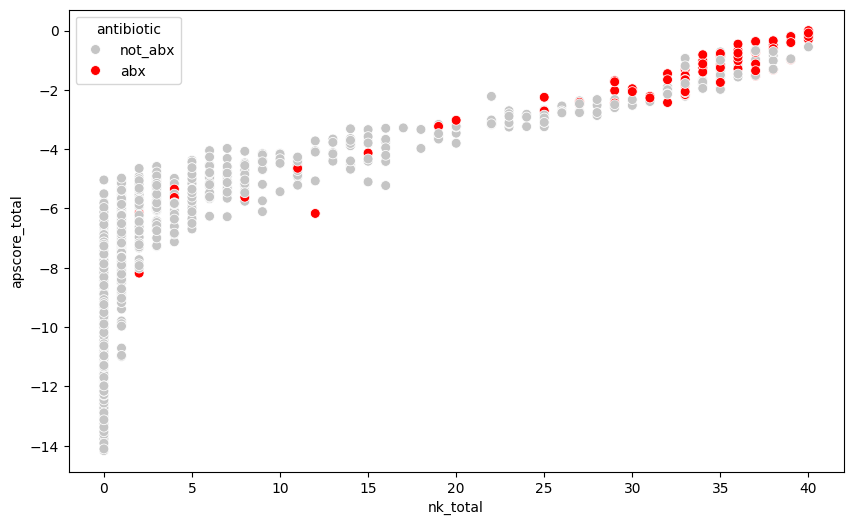

In [65]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=mole_mce_info, y="apscore_total", x="nk_total", hue="antibiotic", 
                palette={"abx": "red", "not_abx": "#C5C5C5"}, s=50)

Text(0.5, 1.0, 'ECFP4 results')

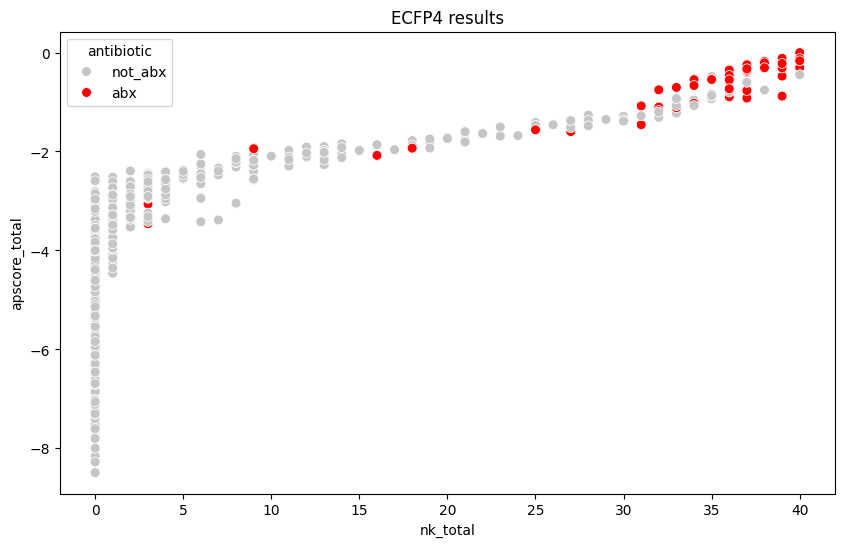

In [20]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=ecfp4_mce_info, y="apscore_total", x="nk_total", hue="antibiotic", 
                palette={"abx": "red", "not_abx": "#C5C5C5"}, s=50)

plt.title("ECFP4 results")

<Axes: xlabel='apscore_gnegative', ylabel='apscore_gpositive'>

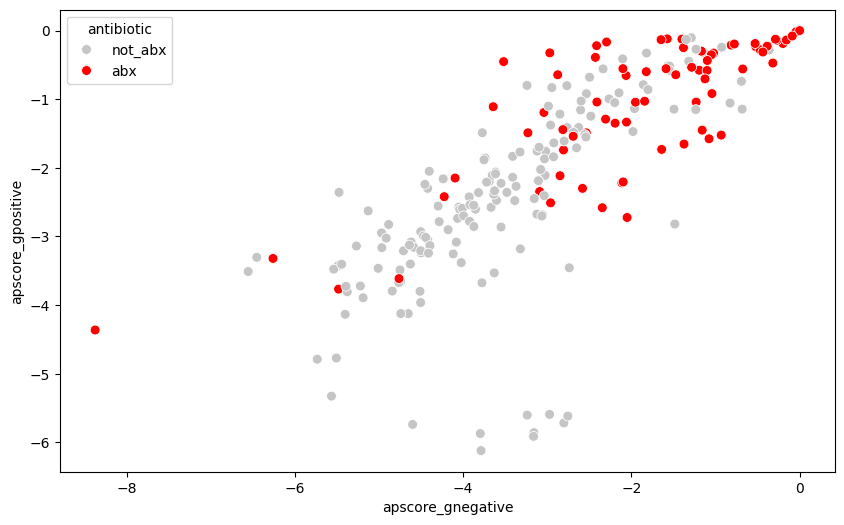

In [66]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=mole_mce_info.loc[mole_mce_info["nk_total"] >= 10], y="apscore_gpositive", x="apscore_gnegative", hue="antibiotic", 
                palette={"abx": "red", "not_abx": "#C5C5C5"}, s=50)

Text(0.5, 1.0, 'ECFP4 results')

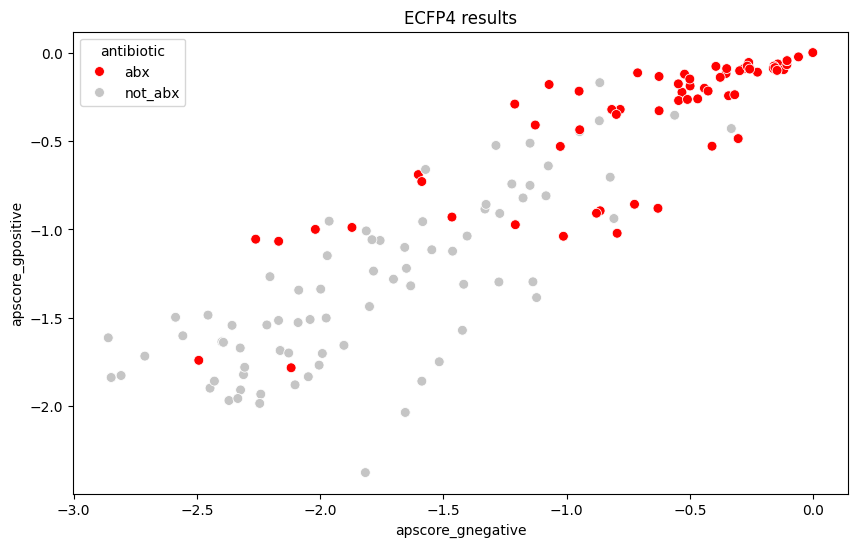

In [22]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=ecfp4_mce_info.loc[ecfp4_mce_info["nk_total"] >= 10], y="apscore_gpositive", x="apscore_gnegative", hue="antibiotic", 
                palette={"abx": "red", "not_abx": "#C5C5C5"}, s=50)

plt.title("ECFP4 results")

## Prepare output

In [67]:
# Add metadata
mole_mce_metadata = mole_mce_info.set_index("chem_id").join(medchemexp_df_filttotal.set_index("Catalog Number")[["ProductName", "atc_description", "Biological Activity"]])
mole_mce_metadata = mole_mce_metadata.reset_index().rename(columns={"chem_id": "Catalog Number"}).sort_values("nk_total", ascending=False)


# Isolate over 10
mole_mce_over10 = mole_mce_metadata.loc[mole_mce_metadata["nk_total"] >= 10]

# Gather the scores
mole_scores_table = mole_mce_predictions.pivot_table(index="chem_id", columns="strain_name", values="pred_score")

In [68]:
with pd.ExcelWriter(os.path.join(OUTPUT_DIR, "mole_mce_predictions.xlsx")) as writer:
    mole_mce_metadata.to_excel(writer, sheet_name="mole_prediction_overview", index=False)
    mole_mce_over10.to_excel(writer, sheet_name="mole_over10", index=False)
    mole_scores_table.to_excel(writer, sheet_name="mole_scores", index=True)    

In [24]:
# Add metadata
ecfp4_mce_metadata = ecfp4_mce_info.set_index("chem_id").join(medchemexp_df_filttotal.set_index("Catalog Number")[["ProductName", "atc_description", "Biological Activity"]])
ecfp4_mce_metadata = ecfp4_mce_metadata.reset_index().rename(columns={"chem_id": "Catalog Number"}).sort_values("nk_total", ascending=False)


# Isolate over 10
ecfp4_mce_over10 = ecfp4_mce_metadata.loc[ecfp4_mce_metadata["nk_total"] >= 10]

# Gather the scores
ecfp4_scores_table = ecfp4_mce_predictions.pivot_table(index="chem_id", columns="strain_name", values="pred_score")

In [25]:
with pd.ExcelWriter(os.path.join(OUTPUT_DIR, "ecfp4_mce_predictions.xlsx")) as writer:
    ecfp4_mce_metadata.to_excel(writer, sheet_name="ecfp4_prediction_overview", index=False)
    ecfp4_mce_over10.to_excel(writer, sheet_name="ecfp4_over10", index=False)
    ecfp4_scores_table.to_excel(writer, sheet_name="ecfp4_scores", index=True)    